# CS 530 Quiz5

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

n = 1000
X1, _ = make_blobs(n_samples=n, centers=[(-5, -5), (5, 5)], shuffle=False, cluster_std=1.5,
                  random_state=42)

X2, _ = make_blobs(n_samples=n, centers=[(0, 0)], shuffle=False, cluster_std=2,
                  random_state=42)

y1 = np.zeros(n)
y2 = np.ones(n)

X = np.vstack([X1, X2])
y = np.hstack([y1, y2])

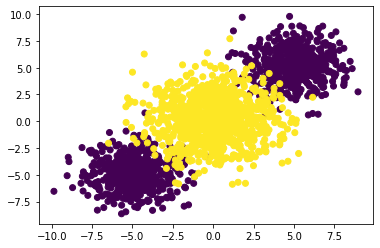

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

Please find a classification algorithm we learned in class that works for this dataset. 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [14]:
from sklearn import svm
from sklearn import metrics

classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)

predictions = classifier.predict_proba(X_test)
falsePositiveRate, truePositiveRate, thresholds = metrics.roc_curve(y_test, predictions[::, 1])
areaUnderCurve = metrics.auc(falsePositiveRate, truePositiveRate)
print(areaUnderCurve)

0.995210898262145
